<div style="width:90%; text-align:center; border-width: 0px; display:block; margin-left:auto; margin-right:auto;">
<div class="alert alert-block alert-success" style="text-align:center; color:navy;">
<img src="https://raw.githubusercontent.com/bgeneto/MCA/main/imagens/logo_unb.png" style="width: 200px; opacity:0.85;">
<h1>Universidade de Brasília</h1>
<h2>Instituto de Física</h2>
<hr style="width:44%;border:1px solid navy;">
<h3>Métodos Computacionais A (MCA)</h3> 
<h4>Prof. Bernhard Enders</h4>
<hr style="width:44%;border:1px solid navy;">
</div>
</div>

# **➲ Aula 12 - Sistemas de Equações Lineares**

Um dos problemas mais clássicos em computação científica é a resolução de sistemas lineares. 

Vale recordar que qualquer sistema linear de $n$ variáveis e $n$ incógnitas pode ser descrito em forma matricial. Ou seja, podemos descrever o problema de resolução de sistemas por uma equação.
\begin{equation*}
Ax = b,
\end{equation*}
em que $A$ é uma matriz de $\mathbb{R}^{n \times n}$ e $b$ um vetor do $\mathbb{R}^n$. É claro que também é possível usar o mesmo tipo de notação para sistemas com números diferentes entre variáveis e incógnitas e nesse caso a matriz deixa de ser quadrada.

Uma primeira pergunta natural é: Quão fácil é resolver um sistema? A resposta para isso não é única. Pensando em um sistema geral, com centenas de variáveis por exemplo, ficamos com a impressão que é muito difícil. Mas se a matriz $A$ tiver estrutura especial, pode ser que a resolução do sistema seja fácil. Dois exemplos são:

* $A$ é a identidade. Nesse caso o solução é trivial $x = b$.
* $A$ é diagonal (todos os elementos fora da diagonal principal de $A$ são nulos). Mais uma vez a solução do sistema também é fácil, basta definir $x_i = b_i / a_{ii},\ i = 1, \ldots, n$, considerando que todos os elementos da diagonal são não nulos.
   
## Sistemas triangulares
   
Outro caso interessante ocorre quando $A$ é triangular inferior, ou superior, com todos os elementos da diagonal não nulos. Nesse caso podemos resolver o sistema por substituição. Vejamos um exemplo triangular superior.

\begin{equation*}
\left\{
\begin{array}{lclclcll}
a_{11}x_1 &+& a_{12}x_2 &+& a_{13}x_3 &+& a_{14}x_4 &= b_1 \\
          & & a_{22}x_2 &+& a_{23}x_3 &+& a_{24}x_4 &= b_2 \\
          & &           & & a_{33}x_3 &+& a_{34}x_4 &= b_3 \\
          & &           & &           & & a_{44}x_4 &= b_4. 
\end{array}
\right.
\end{equation*}

Nesse caso é fácil achar o valor de $x_4$ usando a última equação. Susbtituindo o valor encontrado na penúltima equação passa a ser fácil encontrar encontrar o valor de $x_3$ e a assim por diante. Obtemos:

\begin{align*}
x_4 &= b_4 / a_{44} \\
x_3 &= (b_3 - a_{34} x_4)/a_{33} \\
x_2 &= (b_2 - a_{23} x_3 - a_{24} x_4)/a_{22} \\
x_1 &= (b_1 - a_{12}x_2 - a_{13} x_3 - a_{14} x_4)/a_{11}. \\
\end{align*}

Isso pode ser facilmente generalizado para o caso de mais variáveis. Chegamos à fórmula
\begin{equation}
x_i = \frac{b_i - \sum_{j = i + 1}^n a_{ij} x_j}{a_{ii}},\ i = 1, \ldots, n.
\end{equation}

Vejamos uma implementação simples em Python para a solução de sistemas triangulares.

In [636]:
# Funcao para resolver sistema triangular inferior por substituição progressiva
import numpy as np


def triangular_inferior(A, b):
    n = len(b)
    x = np.zeros(n)
    for i in range(n):
        x[i] = b[i]
        for j in range(i):
            x[i] -= A[i][j] * x[j]
        x[i] /= A[i][i]

    return x


# Exemplo
A = np.array([[1, 0, 0, 0], [2, 3, 0, 0], [4, 5, 6, 0], [7, 8, 9, 10]])

b = np.array([1, 2, 3, 4])

# Resolve o sistema
x = triangular_inferior(A, b)
print("A solução obtida é ", x)

# Verifica a resposta
print("A*x deve ser igual a b...")
A.dot(x)

A solução obtida é  [ 1.          0.         -0.16666667 -0.15      ]
A*x deve ser igual a b...


array([1., 2., 3., 4.])

In [637]:
# Funcao para resolver sistema triangular superior por retrosubstituição
def triangular_superior(A, b):
    n = len(b)
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, n):
            x[i] -= A[i][j] * x[j]
        x[i] /= A[i][i]

    return x


# Exemplo
x = triangular_superior(A.T, b)
print("A solução obtida é ", x)
print("É uma resposta válida?", np.allclose(np.dot(A.T, x), b))

A solução obtida é  [-0.93333333 -0.23333333 -0.1         0.4       ]
É uma resposta válida? True



## ➥ Métodos Iterativos vs Métodos Diretos
---

Os métodos iterativos e os métodos diretos são duas abordagens diferentes para a resolução de sistemas de equações lineares. 

- **Métodos Diretos:** Métodos diretos, como a eliminação Gaussiana e a decomposição LU, resolvem o sistema de equações lineares em um número finito de etapas. Eles são baseados em operações algébricas para manipular as equações do sistema e chegar a uma solução exata. Esses métodos geralmente envolvem a criação de uma matriz triangular, onde a solução do sistema pode ser obtida diretamente por substituição de variáveis. Nos métodos diretos há garantias de encontrar a solução exata, desde que o sistema seja bem condicionado e a matriz do sistema não seja singular. No entanto, eles podem ser computacionalmente intensivos em termos de memória e tempo de execução, especialmente para sistemas de grande porte.

- **Métodos Iterativos:** Métodos iterativos, como o método de Gauss-Seidel e o método de Jacobi, abordam a resolução do sistema de equações lineares de maneira iterativa, isto é, eles partem de uma estimativa inicial da solução e, em seguida, iterativamente refinam essa estimativa até que uma solução aproximada seja encontrada dentro da tolerância desejada. Esses métodos envolvem um processo iterativo de atualização das variáveis desconhecidas com base nas equações do sistema. Os métodos iterativos geralmente convergem para a solução com uma precisão desejada, mas podem exigir um número muito grande de iterações para alcançar a precisão desejada, especialmente em sistemas mal condicionados. Eles podem ser mais eficientes (que os métodos diretos) em termos de memória e tempo de execução para sistemas grandes e esparsos, pois não exigem a manipulação direta de toda a matriz do sistema.

## ➥ Método de Jacobi
---



Vamos utilizar o seguinte exemplo de sistema de equações lineares de ordem $2$ por $2$:

$$
\left\{ \begin{array}{rcrcl}
2.5x &-& y &=& 1.5 \\
x &-& 2y &=& -1.
\end{array}\right.
$$

Podemos facilmente resolver o sistema e verificarque é solução é em $(x, y) = (1, 1)$. Veja o gráfico dele abaixo

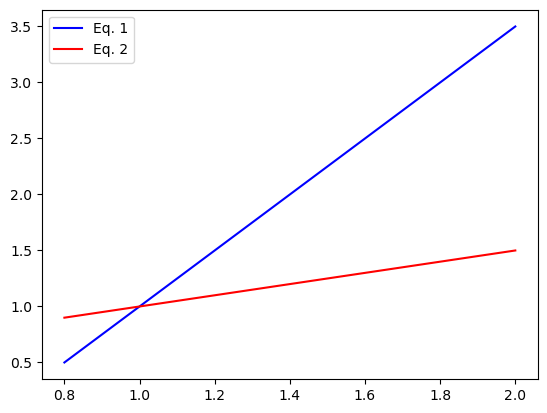

In [638]:
from matplotlib import pyplot as plt

x = np.linspace(0.8, 2.0, 100)
eq1 = lambda x: 2.5 * x - 1.5
eq2 = lambda x: 0.5 * (1.0 + x)

fig, ax = plt.subplots()
ax.plot(x, eq1(x), color="blue", label="Eq. 1")
ax.plot(x, eq2(x), color="red", label="Eq. 2")
ax.legend()
plt.show()

Uma outra forma de encarar as equações do sistema é vê-las como fórmulas de como calcular uma das variáveis das soluções se conhecêssemos a outra. Isso fica claro se reorganizarmos um pouco as duas equações.
\begin{align*}
x &= (1.5 + y)/2.5 \\
y &= (1 + x)/2.
\end{align*}
A ideia do método de Jacobi é melhorar uma aproximação da solução que obtivemos até o momento $k$, que vamos denotar por $(x^k, y^k)$, usando essas duas equações como se elas estivessem partindo da solução exata. Isto é fazer
\begin{align*}
x^{k+1} &= (1.5 + y^k)/2.5 \\
y^{k+1} &= (1 + x^k)/2.
\end{align*}

Geometricamente, o que a primeira equação faz é encontrar a coordenada $x$ do ponto na reta azul que tem coordenada $y = y^k$, ou seja a intersecção da reta azul com uma reta paralela ao eixo x que passar por $(x^k, y^k)$. Já a segunda equação busca a coordenada $y$ do ponto na reta vermelha que cruza com uma reta vertical que passa também por $(x^k, y^k)$.

Para entender isso melhor, imagine que temos $(x^k, y^k) = (1.8, 2.5)$. O código abaixo representa as contas feitas a apresenta o novo ponto calculado bem como o ponto de partida. Note que o novo ponto se aproxima da solução que é a intersecção das retas.

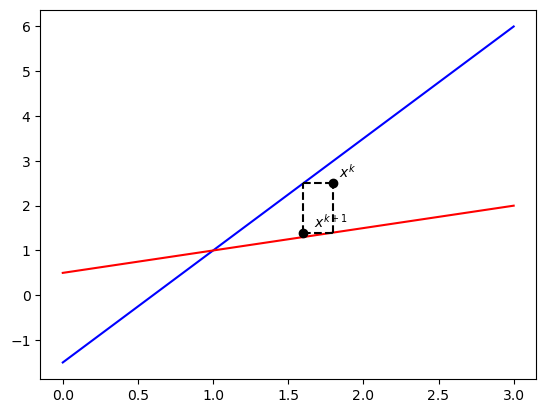

In [639]:
# Apresenta o grafico inicial
x = np.linspace(0, 3, 100)
plt.plot(x, eq1(x), color="blue")
plt.plot(x, eq2(x), color="red")

# Apresenta o ponto de partida e as linhas que geram o novo ponto
xk, yk = 1.8, 2.5
plt.plot(xk, yk, marker="o", color="black")
plt.annotate(r"$x^k$", (xk + 0.035, yk + 0.125))

# Calcula o novo ponto e o apresenta
xk1 = (1.5 + yk) / 2.5
yk1 = (1.0 + xk) / 2
deltax = np.linspace(xk1, xk, 100)
deltay = np.linspace(yk1, yk, 100)
plt.plot(deltax, yk * np.ones(len(deltax)), linestyle="--", color="black")
plt.plot(xk * np.ones(len(deltay)), deltay, linestyle="--", color="black")
plt.plot(xk1, yk1, marker="o", color="black")
plt.plot(deltax, yk1 * np.ones(len(deltax)), linestyle="--", color="black")
plt.plot(xk1 * np.ones(len(deltay)), deltay, linestyle="--", color="black")
plt.annotate(r"$x^{k+1}$", (xk1 + 0.07, yk1 + 0.125))

plt.show()

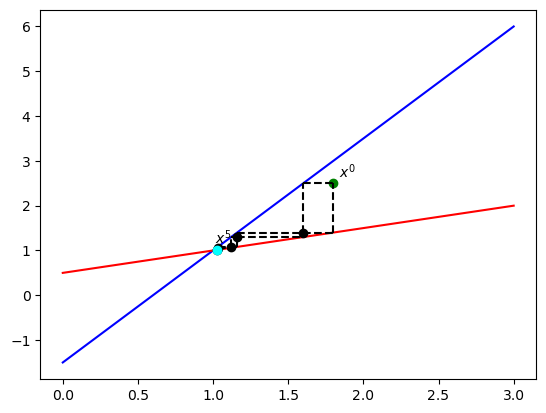

In [640]:
# Ponto incial
xk, yk = 1.8, 2.5
# Numero de iteracoes
maxiter = 5

# Apresenta o grafico inicial
x = np.linspace(0, 3, 100)
plt.plot(x, eq1(x), color="blue")
plt.plot(x, eq2(x), color="red")

# Apresenta o ponto de partida em verde e as linhas que geram o novo ponto
y = np.linspace(0.5, 3.0, 100)
plt.plot(xk, yk, marker="o", color="green")
plt.annotate(r"$x^0$", (xk + 0.035, yk + 0.125))

# Calcula os novos pontos e os apresenta
for i in range(maxiter):
    xk1 = (1.5 + yk) / 2.5
    yk1 = (1.0 + xk) / 2.0
    deltax = np.linspace(xk1, xk, 100)
    deltay = np.linspace(yk1, yk, 100)
    plt.plot(deltax, yk * np.ones(len(deltax)), linestyle="--", color="black")
    plt.plot(xk * np.ones(len(deltay)), deltay, linestyle="--", color="black")
    plt.plot(xk1, yk1, marker="o", color="black")
    plt.plot(deltax, yk1 * np.ones(len(deltax)), linestyle="--", color="black")
    plt.plot(xk1 * np.ones(len(deltay)), deltay, linestyle="--", color="black")
    xk, yk = xk1, yk1

# Apresenta o ponto final em cyan
plt.plot(xk, yk, marker="o", color="cyan")
label = f"$x^{{{maxiter}}}$"
plt.annotate(label, (xk - 0.01, yk + 0.125))
plt.show()

In [641]:
# implemente o método de Jacobi para resolver um sistema de equações lineares de qualquer ordem
def jacobi(A, b, x0, tol=1e-10, max_iterations=5000):
    """
    Esta função implementa o método iterativo de Jacobi para resolver sistemas de equações lineares
    com uma matriz A e vetor b. Ele retorna uma estimativa para o vetor x que satisfaz a equação Ax = b dentro
    de uma tolerância especificada.

    Parâmetros:
    -- A: uma matriz numpy bidimensional representando o sistema de equações lineares
    -- b: um vetor numpy unidimensional representando o lado direito do sistema de equações lineares
    -- tol (opcional): um float representando a tolerância de convergência do método iterativo de Jacobi (padrão é 1e-13)
    -- max_iterations (opcional): um inteiro representando o número máximo de iterações que o método iterativo de Jacobi deve executar (padrão é 5000)

    Retorna:
    -- x: um vetor numpy unidimensional representando uma estimativa para o vetor x que satisfaz Ax = b
    -- k: um inteiro representando o número de iterações que o método iterativo de Jacobi executou
    """
    # diagonal de A
    diag = np.diag(A)
    # estimativa inicial
    x = x0.copy()
    # matriz A sem a diagonal principal
    T = A - np.diag(diag)
    # iterações de Jacobi
    for k in range(max_iterations):
        x_old = x.copy()
        x[:] = (b - np.dot(T, x)) / diag
        if np.linalg.norm(x - x_old, ord=np.inf) / np.linalg.norm(x, ord=np.inf) < tol:
            break
    else:
        raise ValueError("O método de Jacobi não convergiu após {} iterações".format(k))

    return x, k


In [642]:
def is_diagonally_dominant(A):
    """
    Esta função verifica se uma determinada matriz A é diagonalmente dominante ou não.
    Uma matriz é considerada diagonalmente dominante se o valor absoluto do elemento diagonal
    em cada linha for maior ou igual à soma dos valores absolutos dos elementos fora da diagonal nessa linha.

    Parâmetros:
    -- A: uma matriz numpy bidimensional representando a matriz a ser verificada

    Retorna:
    -- True se a matriz for diagonalmente dominante, False caso contrário.
    """
    abs_diag = np.abs(np.diag(A))
    abs_off_diag_sum = np.sum(np.abs(A), axis=1) - abs_diag
    return np.all(abs_diag >= abs_off_diag_sum)

In [643]:
def generate_test_matrix(n):
    """
    Esta função gera uma matriz simétrica positiva definida aleatória de tamanho n
    e, em seguida, a torna diagonalmente dominante.
    """
    # Generate a random matrix
    A = np.random.rand(n, n)
    # Make it symmetric by using its transpose
    A = np.dot(A, A.transpose())
    # Make the matrix diagonally dominant
    new_diagonal = (
        np.abs(np.diag(A)) + np.max(np.sum(np.abs(A), axis=1) - np.abs(np.diag(A))) + 1
    )
    np.fill_diagonal(A, new_diagonal)
    return A

In [644]:
n = 1500
A = generate_test_matrix(n)


In [645]:
is_diagonally_dominant(A)


True

In [646]:
b = np.random.rand(n)
x0 = b / np.diag(A)
x, k = jacobi(A, b, x0)
print("Iterações executadas:", k)
np.allclose(A.dot(x), b)


Iterações executadas: 483


True

In [647]:
def gauss_seidel(A, b, x0, tol=1e-10, max_iter=1000):
    """Solve a linear system Ax=b using Gauss-Seidel method.

    Parameters
    ----------
    A : ndarray of shape (n, n)
        Coefficient matrix
    b : ndarray of shape (n,)
        Right-hand side vector
    x0 : ndarray of shape (n,)
        Initial guess for the solution
    tol : float, optional
        Tolerance for convergence
    max_iter : int, optional
        Maximum number of iterations

    Returns
    -------
    x : ndarray of shape (n,)
        Solution vector
    """
    n = len(b)
    x_old = x0.copy()
    for k in range(max_iter):
        for i in range(n):
            x[i] = (
                b[i]
                - np.dot(A[i, :i], x[:i])
                - np.dot(A[i, (i + 1) :], x_old[(i + 1) :])
            ) / A[i, i]
        if np.linalg.norm(x - x_old, ord=np.inf) / np.linalg.norm(x, ord=np.inf) < tol:
            break
        x_old[:] = x
    else:
        raise ValueError("O método não convergiu após {} iterações".format(k))

    return x, k

In [648]:
def gauss_seidel2(A, b, x0, tol=1e-10, max_iter=1000):
    """Solve a linear system Ax=b using Gauss-Seidel method.

    Parameters
    ----------
    A : ndarray of shape (n, n)
        Coefficient matrix
    b : ndarray of shape (n,)
        Right-hand side vector
    x0 : ndarray of shape (n,)
        Initial guess for the solution
    tol : float, optional
        Tolerance for convergence
    max_iter : int, optional
        Maximum number of iterations

    Returns
    -------
    x : ndarray of shape (n,)
        Solution vector
    """
    n = len(A)
    x = x0.copy()
    for k in range(max_iter):
        x_new = np.zeros_like(x, dtype=np.double)
        for i in range(n):
            sum_ax = A[i, :i].dot(x_new[:i])
            sum_ax += A[i, i + 1 :].dot(x[i + 1 :])
            x_new[i] = (b[i] - sum_ax) / A[i, i]
        if np.linalg.norm(x - x_new, ord=np.inf) / np.linalg.norm(x, ord=np.inf) < tol:
            break
        x = x_new
    else:
        raise ValueError("O método não convergiu após {} iterações".format(k))
    return x, k

In [649]:
x, k = gauss_seidel(A, b, x0)
print("Iterações executadas:", k)
np.allclose(A.dot(x), b)

Iterações executadas: 15


True

In [650]:
x, k = gauss_seidel2(A, b, x0)
print("Iterações executadas:", k)
np.allclose(A.dot(x), b)

Iterações executadas: 15


True

In [651]:
%%timeit
jacobi(A, b, x0)

48.5 ms ± 4.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [652]:
%%timeit
gauss_seidel(A, b, x0)

40.1 ms ± 718 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [653]:
%%timeit
gauss_seidel2(A, b, x0)

30.5 ms ± 701 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
